# Introduction
Look at fictional data as an exercise in aggregating and visualizing data to look for insights.

### Imports
Import libraries and write settings here.

In [9]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
# import seaborn as sn

%matplotlib inline

from IPython.display import display

# Analysis/Modeling
Do work here

In [2]:
# load data
ride_df = pd.read_csv('data/ride_data.csv')
city_df = pd.read_csv('data/city_data.csv')


In [3]:
# Aggregate the Data
rides_agg = ride_df.groupby('city').agg({'fare': ['mean', 'sum'], 'ride_id': 'count'})
rides_agg.columns = ['Average Fare', 'Sum of Fares', 'Total Rides']
rides_agg = rides_agg.reset_index()
rides_agg.head()

,city,Average Fare,Sum of Fares,Total Rides
0,Amandaburgh,24.641667,443.55,18
1,Barajasview,25.332273,557.31,22
2,Barronchester,36.422500,582.76,16
3,Bethanyland,32.956111,593.21,18
4,Bradshawfurt,40.064000,400.64,10


In [4]:
# Merge with the city data
rides_agg = pd.merge(rides_agg, city_df, on='city', how='left')
rides_agg.head()

,city,Average Fare,Sum of Fares,Total Rides,driver_count,type
0,Amandaburgh,24.641667,443.55,18,12,Urban
1,Barajasview,25.332273,557.31,22,26,Urban
2,Barronchester,36.422500,582.76,16,11,Suburban
3,Bethanyland,32.956111,593.21,18,22,Suburban
4,Bradshawfurt,40.064000,400.64,10,7,Rural


In [5]:
# colors = {'Urban': 'gold', 'Suburban': 'ligthskyblue', 'Rural': 'lightcoral'}
colors = {'Urban': 'gold', 'Suburban': 'lightskyblue', 'Rural': 'lightcoral'}

rides_agg['color'] = rides_agg['type'].map(colors)

,city,Average Fare,Sum of Fares,Total Rides,driver_count,type,color
0,Amandaburgh,24.641667,443.55,18,12,Urban,gold
1,Barajasview,25.332273,557.31,22,26,Urban,gold
2,Barronchester,36.422500,582.76,16,11,Suburban,lightskyblue
3,Bethanyland,32.956111,593.21,18,22,Suburban,lightskyblue
4,Bradshawfurt,40.064000,400.64,10,7,Rural,lightcoral


# Results
Show graphs and stats here

## Analysis of Driver's Fares in Different Cities
Compare the Drivers fares and ride counts across different cities and city types.

,city,Average Fare,Sum of Fares,Total Rides,driver_count,type,color,driver_count2
0,Amandaburgh,24.641667,443.55,18,12,Urban,gold,120.0
1,Barajasview,25.332273,557.31,22,26,Urban,gold,260.0
2,Barronchester,36.422500,582.76,16,11,Suburban,lightskyblue,110.0
3,Bethanyland,32.956111,593.21,18,22,Suburban,lightskyblue,220.0
4,Bradshawfurt,40.064000,400.64,10,7,Rural,lightcoral,70.0


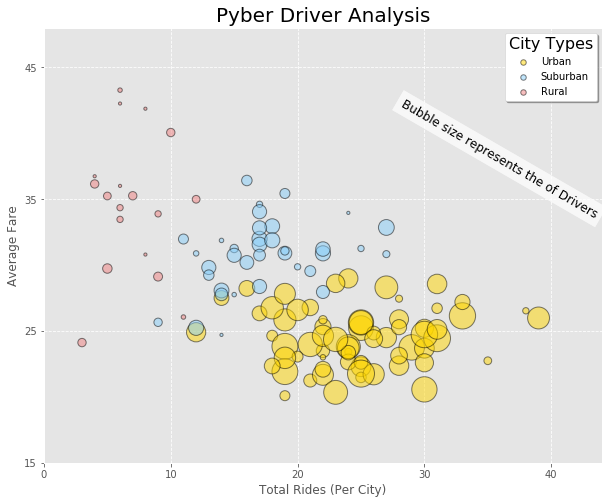

In [10]:
plt.style.use('ggplot')

# Bubble plot
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Pyber Driver Analysis', fontsize=20)
ax.set_frame_on(True)

# Format y-axis
max_fare = round(max(rides_agg['Average Fare'])+5, 0)
min_fare = round(min(rides_agg['Average Fare'])-5, 0)
ax.set_ylabel('Average Fare')
ax.set_ylim((min_fare, max_fare))
ax.set_yticks(np.arange(min_fare, max_fare, 10))

# Format x-axis
max_rides = max(rides_agg['Total Rides'])+5
ax.set_xlabel('Total Rides (Per City)')
ax.set_xlim((0, max_rides))
ax.set_xticks(np.arange(0, max_rides, 10))

# Plot the data
colors = ['Gold', 'lightskyblue', 'lightcoral']
count=0
options = {'alpha': .5, 
           'edgecolors': 'k',
           'linewidths': 1
          }

# increase driver_count to emphasize variance
rides_agg['driver_count2'] = rides_agg['driver_count']**1. * 10

for city_type in rides_agg['type'].unique():
    filt = rides_agg['type'] == city_type
    curr_city_type = rides_agg[filt]
    ax.scatter('Total Rides', 'Average Fare', s='driver_count2', 
               data=curr_city_type, color=colors[count], label=city_type, **options)
    count+=1

# Create the legend
lgnd = ax.legend(title='City Types', title_fontsize='16', frameon=True, 
          facecolor='white', shadow=True, markerscale=1, scatterpoints=1)

# Normalize the legend marker sizes
for leg_hand in lgnd.legendHandles:
    leg_hand._sizes = [30]

ax.grid(linestyle='dashed')

# Add some text to describe the bubble sizes
s = 'Bubble size represents the of Drivers'
text = ax.text(x=28, y=42, s=s, color='black', backgroundcolor=(1,1,1,.7),
              fontsize=12, rotation=-30)
display(rides_agg.head())

## Comparison by city type
Look at equity of fares, rides and drivers across city types.



In [11]:
# Aggregate the data by city
city_agg = rides_agg.groupby(['type', 'color']).agg(
    {'Sum of Fares': 'sum', 'Total Rides': 'sum', 'driver_count': 'sum'}).reset_index()
city_agg = city_agg.rename(columns={'driver_count': 'Total Drivers'})
city_agg['frac'] = city_agg['Total Drivers']/24000
city_agg['Rides per Driver'] = city_agg['Total Rides'] / city_agg['Total Drivers']
city_agg

,type,color,Sum of Fares,Total Rides,Total Drivers,frac,Rides per Driver
0,Rural,lightcoral,4327.93,125,78,0.003250,1.602564
1,Suburban,lightskyblue,19356.33,625,490,0.020417,1.275510
2,Urban,gold,39854.38,1625,2405,0.100208,0.675676


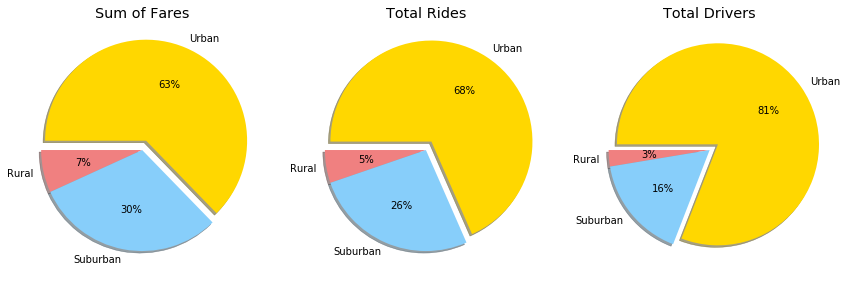

In [12]:
pie_fig, pie_ax_array = plt.subplots(1,3, figsize=(12,8))
data_list = ['Sum of Fares', 'Total Rides', 'Total Drivers']

for idx, data in enumerate(data_list):
    curr_ax = pie_ax_array[idx]
    curr_ax.pie(data, colors='color', labels='type', data=city_agg, explode=[0,0,.1], 
                autopct='%.0f%%', shadow=True, startangle=180)
    curr_ax.set_title(data)
    
pie_fig.tight_layout()

# Conclusions and Next Steps

## Conclusions

* Unsurprisingly, the bulk of revenue and riders come from Urban centers. 
* However the sum of the fares is disproportionately large for Rural and Suburban areas.
* There is a negative correlation between total rides and average fare. This can be explained by: 
    * the high number of drivers in urban areas.
    * drivers in rural areas taking fewer, more lucrative fares. 

## Next Steps

* Look at wait time in Rural and Suburban areas. Lower density of drivers could mean that customers are waiting longer. High wage means there's an opportunity to add incentives to add new drivers and increase customer base.